In [3]:
import zipfile
import os

In [3]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
base_dir = './Banana Ripeness Classification Dataset'
print(os.listdir(base_dir))

['train', 'valid', 'test']


In [5]:
import tensorflow as tf

# Verificar versión de TensorFlow
print("TensorFlow version:", tf.__version__)

# Verificar si detecta GPUs
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

# Verificar si está construido con CUDA
print("Construido con CUDA:", tf.test.is_built_with_cuda())

# Test simple de GPU
print("GPU disponible:", tf.test.is_gpu_available())

import tensorflow as tf

# Configurar GPU ANTES de inicializar cualquier modelo u operación
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("✅ GPU detectada y configurada correctamente:", gpus)
    except RuntimeError as e:
        print("⚠️ Error al configurar la GPU:", e)
else:
    print("❌ No se detectó GPU")

TensorFlow version: 2.15.0
GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Construido con CUDA: True
GPU disponible: True
✅ GPU detectada y configurada correctamente: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-06-10 13:49:32.212775: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-10 13:49:32.213359: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-10 13:49:32.213722: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

valid_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'valid'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
)

test_generator = valid_test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 11793 images belonging to 4 classes.
Found 1123 images belonging to 4 classes.
Found 562 images belonging to 4 classes.


In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Igual que antes
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

2025-06-10 13:49:48.938681: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-10 13:49:48.939275: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-10 13:49:48.939610: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                         

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

Epoch 1/10


2025-06-10 13:50:23.547328: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-06-10 13:50:29.440166: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f66a8d67590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-06-10 13:50:29.440259: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 5000, Compute Capability 7.5
2025-06-10 13:50:29.503814: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749563429.851257     281 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


369/369 [==============================] - 323s 841ms/step - loss: 0.4714 - accuracy: 0.8273 - val_loss: 0.1364 - val_accuracy: 0.9590
Epoch 2/10
369/369 [==============================] - 307s 831ms/step - loss: 0.2116 - accuracy: 0.9294 - val_loss: 0.1037 - val_accuracy: 0.9688
Epoch 3/10
369/369 [==============================] - 289s 782ms/step - loss: 0.1642 - accuracy: 0.9453 - val_loss: 0.1044 - val_accuracy: 0.9679
Epoch 4/10
240/369 [==================>...........] - ETA: 1:36 - loss: 0.1494 - accuracy: 0.9491

In [9]:
model.save('RESNET50.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 3s 138ms/step
Classification Report
              precision    recall  f1-score   support

    overripe       0.98      0.96      0.97       113
        ripe       0.97      0.97      0.97       154
      rotten       0.96      0.98      0.97       185
      unripe       0.99      0.96      0.98       110

    accuracy                           0.97       562
   macro avg       0.97      0.97      0.97       562
weighted avg       0.97      0.97      0.97       562

Confusion Matrix


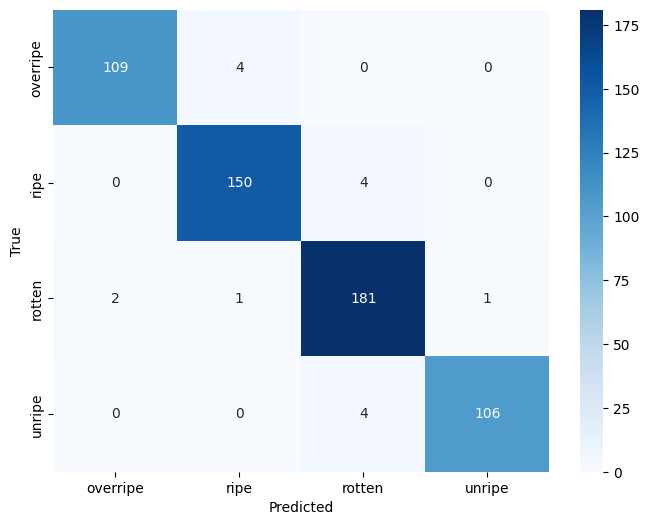

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicciones
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Reporte y matriz de confusión
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)

# Visualizar la matriz
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys(), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
